In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# !pip install tinkoff-investments

In [ ]:
# %env INVEST_TOKEN <<ВАШ ТОКЕН>>

In [40]:
import os
from datetime import timedelta

from tinkoff.invest import CandleInterval, Client
from tinkoff.invest.utils import now

TOKEN = os.environ["INVEST_TOKEN"]

def main(FIGI):
    candles = []
    with Client(TOKEN) as client:
        for candle in client.get_all_candles(
            figi=FIGI,
            from_=now() - timedelta(days=365),
            interval=CandleInterval.CANDLE_INTERVAL_DAY,
        ):
            candles.append(candle)

    return candles


if __name__ == "__main__":
    figi = "BBG004730N88" # акция Сбербанка
    res = main(figi)

In [67]:
proc_res = list(map(lambda x:
                    [x.time.strftime("%d/%m/%y"), 
                    x.open.units, 
                    x.close.units, 
                    x.high.units, 
                    x.low.units], res))


In [96]:
# Построим график для Сбера за последние 100 дней
prices = pd.DataFrame(proc_res[-100:-1], columns=['date', 'open', 'close', 'high', 'low'])

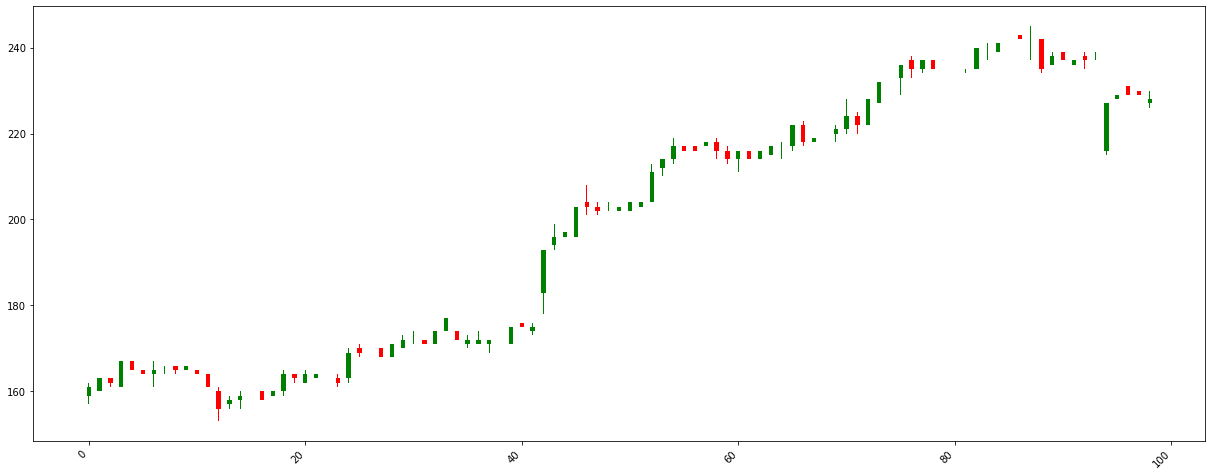

In [98]:
plt.figure(figsize=(21, 8))

width = .4
width2 = .05

up = prices[prices['close'] >=prices['open']]
down = prices[prices['close'] < prices['open']]

col1 = 'green'
col2 = 'red'

plt.bar(up.index, up['close'] - up['open'], width, bottom=up['open'], color=col1)
plt.bar(up.index, up['high'] - up['close'], width2, bottom=up['close'], color=col1)
plt.bar(up.index, up['low'] - up['open'], width2, bottom=up['open'], color=col1)

plt.bar(down.index, down['close'] - down['open'], width, bottom=down['open'], color=col2)
plt.bar(down.index, down['high'] - down['close'], width2, bottom=down['close'], color=col2)
plt.bar(down.index, down['low'] - down['open'], width2, bottom=down['open'], color=col2)

plt.xticks(rotation=45, ha='right')

plt.show() 